# Temperature profiles
This tutorial shows a more in-deph description of the Guillot and Madhu temperature-profile models, and how they behave as a function of each free parameter.

1. [Guillot Profiles](#understanding-guillot-parameters)
2. [Madhu parameters](#understanding-madhu-parameters)

<div class="alert alert-info">

Note

You can also find this tutorial as a [jupyter notebook here](../_static/data/temperature_profiles_indepth.ipynb).

</div>

---

## Understanding Guillot parameters

The following notebook shows how the Guillot temperature profiles behave as a function of each free parameter.

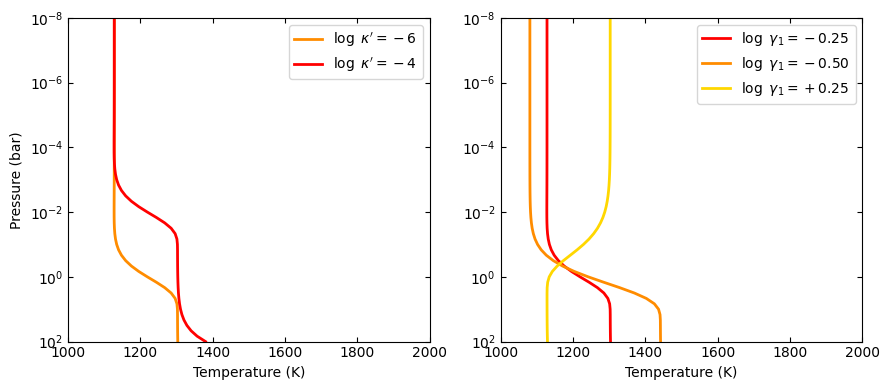

In [1]:
# Lets start by importing some necessary modules
import pyratbay.atmosphere as pa
import matplotlib.pyplot as plt
import numpy as np


# Initialize TP model and define some default parameters:
pressure = pa.pressure(ptop='1e-8 bar', pbottom='100 bar', nlayers=61)
tp_guillot = pa.tmodels.Guillot(pressure)
log_kappa, log_gamma1, log_gamma2, alpha, t_irr, t_int = -6.0, -0.25, 0.0, 0.0, 1200.0, 100.0

# log_kappa sets the pressure where the profile changes:
# Think it as: log_P0_bars approx 6 + log_kappa
params01 = -6.0, log_gamma1, log_gamma2, alpha, t_irr, t_int
params02 = -4.0, log_gamma1, log_gamma2, alpha, t_irr, t_int
temp_guillot01 = tp_guillot(params01)
temp_guillot02 = tp_guillot(params02)


# log_gamma sets the pressure where the profile changes:
# Think it as: log_gamma > 0 temperature inversion, log_gamma < 0: non-inversion
params11 = log_kappa, -0.25, log_gamma2, alpha, t_irr, t_int
params12 = log_kappa, -0.50, log_gamma2, alpha, t_irr, t_int
params13 = log_kappa, +0.25, log_gamma2, alpha, t_irr, t_int
temp_guillot11 = tp_guillot(params11)
temp_guillot12 = tp_guillot(params12)
temp_guillot13 = tp_guillot(params13)


# Plot the results:
plt.figure(21, (9.0,4.0))
plt.clf()
ax = plt.subplot(121)
pname = tp_guillot.texnames[0]
ax.plot(temp_guillot01, pressure, color='darkorange', lw=2.0, label=f'{pname}$=-6$')
ax.plot(temp_guillot02, pressure, color='red', lw=2.0, label=f'{pname}$=-4$')
ax.set_yscale('log')
ax.tick_params(which='both', right=True, top=True, direction='in')
ax.set_xlim(1000, 2000)
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (bar)')
ax.legend()

ax = plt.subplot(122)
pname = tp_guillot.texnames[1]
ax.plot(temp_guillot11, pressure, color='red', lw=2.0, label=f'{pname}$=-0.25$')
ax.plot(temp_guillot12, pressure, color='darkorange', lw=2.0, label=f'{pname}$=-0.50$')
ax.plot(temp_guillot13, pressure, color='gold', lw=2.0, label=f'{pname}$=+0.25$')
ax.set_yscale('log')
ax.tick_params(which='both', right=True, top=True, direction='in')
ax.set_xlim(1000, 2000)
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.legend()
plt.tight_layout()

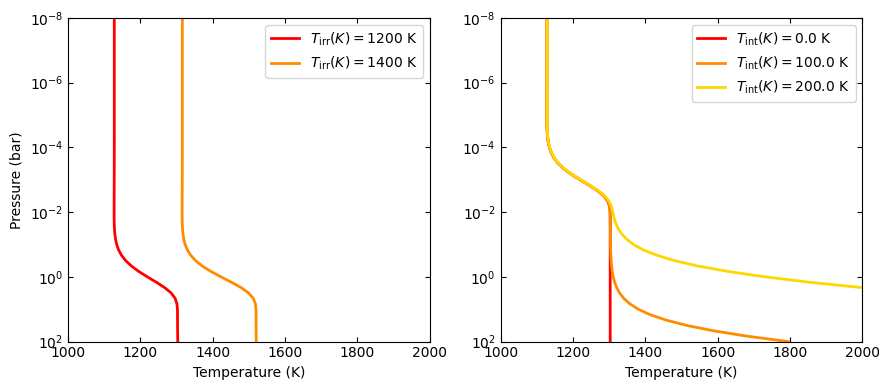

In [2]:
# T_irr sets how much incident flux the atmosphere receives:
# Think it as: higher T_irr, higher overall temperature
params21 = log_kappa, log_gamma1, log_gamma2, alpha, 1200.0, t_int
params22 = log_kappa, log_gamma1, log_gamma2, alpha, 1400.0, t_int
temp_guillot21 = tp_guillot(params21)
temp_guillot22 = tp_guillot(params22)

# T_int sets the planet internal heat from the bottom of the model:
# Think it as: higher T_int, stronger higher overall temperature
params31 = -3.0, log_gamma1, log_gamma2, alpha, t_irr, 0.0
params32 = -3.0, log_gamma1, log_gamma2, alpha, t_irr, 100.0
params33 = -3.0, log_gamma1, log_gamma2, alpha, t_irr, 300.0
temp_guillot31 = tp_guillot(params31)
temp_guillot32 = tp_guillot(params32)
temp_guillot33 = tp_guillot(params33)

plt.figure(22, (9.0,4.0))
plt.clf()
ax = plt.subplot(121)
pname = tp_guillot.texnames[4]
ax.plot(temp_guillot21, pressure, color='red', lw=2.0, label=f'{pname}$=1200$ K')
ax.plot(temp_guillot22, pressure, color='darkorange', lw=2.0, label=f'{pname}$=1400$ K')
ax.set_yscale('log')
ax.tick_params(which='both', right=True, top=True, direction='in')
ax.set_xlim(1000, 2000)
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (bar)')
ax.legend()

ax = plt.subplot(122)
pname = tp_guillot.texnames[5]
ax.plot(temp_guillot31, pressure, color='red', lw=2.0, label=f'{pname}$=0.0$ K')
ax.plot(temp_guillot32, pressure, color='darkorange', lw=2.0, label=f'{pname}$=100.0$ K')
ax.plot(temp_guillot33, pressure, color='gold', lw=2.0, label=f'{pname}$=200.0$ K')
ax.set_yscale('log')
ax.tick_params(which='both', right=True, top=True, direction='in')
ax.set_xlim(1000, 2000)
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.legend()
plt.tight_layout()

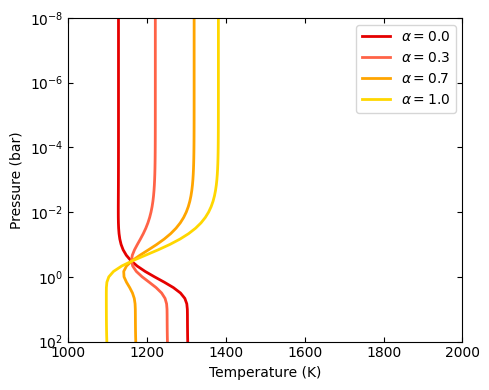

In [3]:
# A non-zero alpha (in combination with gamma2) enables a linear combination
# of two profiles with different gamma values:
temp_guillot41 = tp_guillot([log_kappa, -0.25, 0.4, 0.0, t_irr, t_int])
temp_guillot42 = tp_guillot([log_kappa, -0.25, 0.4, 0.3, t_irr, t_int])
temp_guillot43 = tp_guillot([log_kappa, -0.25, 0.4, 0.7, t_irr, t_int])
temp_guillot44 = tp_guillot([log_kappa, -0.25, 0.4, 1.0, t_irr, t_int])


plt.figure(23, (5.0,4.0))
plt.clf()
ax = plt.subplot(111)
pname = tp_guillot.texnames[3]
ax.plot(temp_guillot41, pressure, color='xkcd:red', lw=2.0, label=f'{pname}$=0.0$')
ax.plot(temp_guillot42, pressure, color='tomato', lw=2.0, label=f'{pname}$=0.3$')
ax.plot(temp_guillot43, pressure, color='orange', lw=2.0, label=f'{pname}$=0.7$')
ax.plot(temp_guillot44, pressure, color='gold', lw=2.0, label=f'{pname}$=1.0$')
ax.set_yscale('log')
ax.tick_params(which='both', right=True, top=True, direction='in')
ax.set_xlim(1000, 2000)
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_ylabel('Pressure (bar)')
ax.set_xlabel('Temperature (K)')
ax.legend()
plt.tight_layout()

---

## Understanding Madhu parameters
The following notebook shows how the Madhu temperature profiles behave as a function of each free parameter.

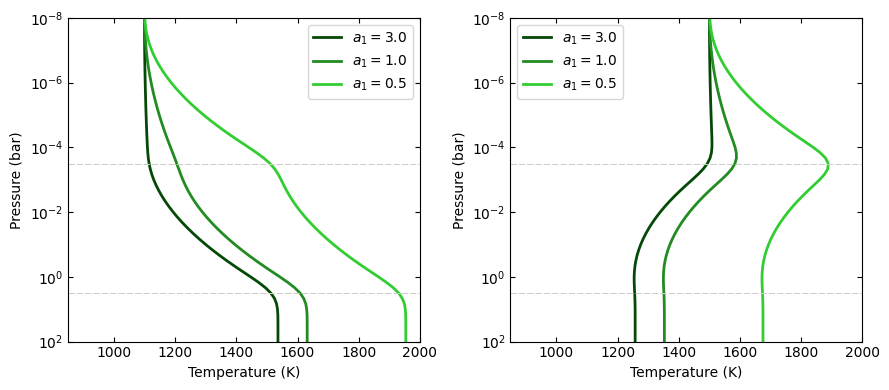

In [4]:
# Lets start by importing some necessary modules
import pyratbay.atmosphere as pa
import matplotlib.pyplot as plt
import numpy as np


# Initialize TP model and define some default parameters:
pressure = pa.pressure(ptop='1e-8 bar', pbottom='100 bar', nlayers=61)
tp_madhu = pa.tmodels.Madhu(pressure)
log_p1, log_p2, log_p3, a1, a2, T0 = -3.5, -4.0, 0.5, 3.0, 0.5, 1100.0


log_p2_ninv = -4.0
log_p2_inv = 0.0
T0_ninv = 1100.0
T0_inv = 1500.0

# a1 sets the gradient above the p1 pressure level:
# a1 >> 0.0: isothermal layer, a1>0: T increases away from P0

# Non-inverted TP profile
temp_madhu01 = tp_madhu([log_p1, log_p2_ninv, log_p3, 3.0, a2, T0_ninv])
temp_madhu02 = tp_madhu([log_p1, log_p2_ninv, log_p3, 1.0, a2, T0_ninv])
temp_madhu03 = tp_madhu([log_p1, log_p2_ninv, log_p3, 0.5, a2, T0_ninv])

# Inverted TP profile
temp_madhu11 = tp_madhu([log_p1, log_p2_inv, log_p3, 3.0, a2, T0_inv])
temp_madhu12 = tp_madhu([log_p1, log_p2_inv, log_p3, 1.0, a2, T0_inv])
temp_madhu13 = tp_madhu([log_p1, log_p2_inv, log_p3, 0.5, a2, T0_inv])

temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[3]
labels = [f'{pname}$={val}$' for val in (3.0, 1.0, 0.5)]

plt.figure(31, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[2])
    ax.axhline(10**log_p1, lw=0.75, dashes=(6,2), color='0.8')
    ax.axhline(10**log_p3, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(850, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()
plt.tight_layout()

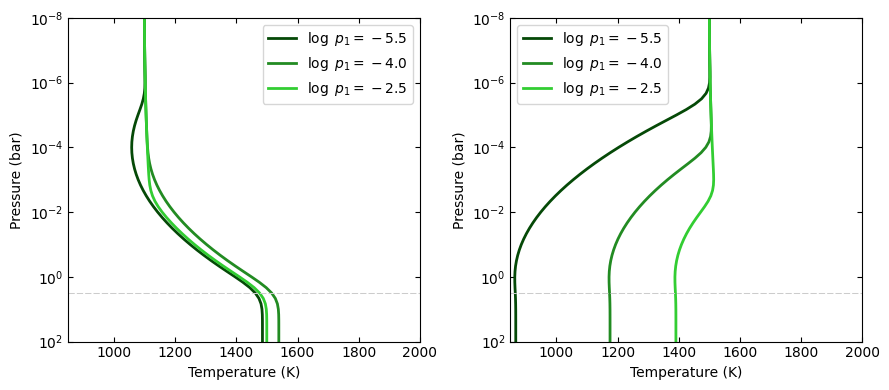

In [5]:
# log_p1 sets the location of the top layer:
# Note that since this is a piece-wise constructed model, the value
# of p1 has significant implications for the entire profile:

# Non-inverted TP profile
temp_madhu01 = tp_madhu([-5.5, log_p2_ninv, log_p3, a1, a2, T0_ninv])
temp_madhu02 = tp_madhu([-4.0, log_p2_ninv, log_p3, a1, a2, T0_ninv])
temp_madhu03 = tp_madhu([-2.5, log_p2_ninv, log_p3, a1, a2, T0_ninv])

# Inverted TP profile
temp_madhu11 = tp_madhu([-5.5, log_p2_inv, log_p3, a1, a2, T0_inv])
temp_madhu12 = tp_madhu([-4.0, log_p2_inv, log_p3, a1, a2, T0_inv])
temp_madhu13 = tp_madhu([-2.5, log_p2_inv, log_p3, a1, a2, T0_inv])

temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[0]
labels = [f'{pname}$={val}$' for val in (-5.5, -4.0, -2.5)]

plt.figure(32, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[2])
    ax.axhline(10**log_p3, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(850, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()
plt.tight_layout()

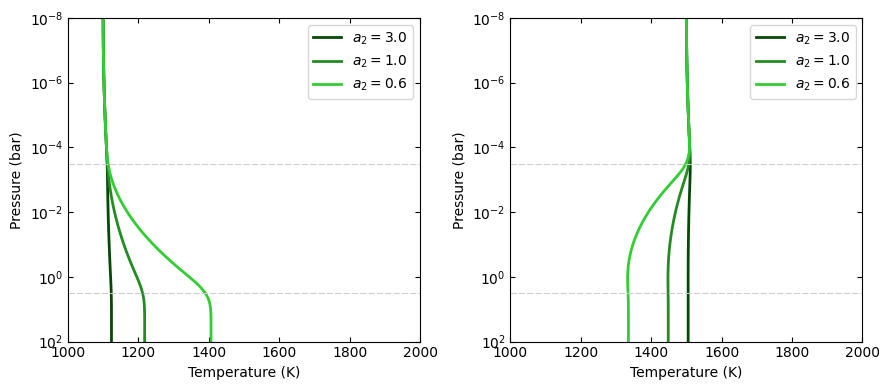

In [6]:
# a2 sets the temperature gradient between p3 < p < p1:
# a2 >> 0.0: isothermal layer, a2>0: T increases away from p2

# Non-inverted TP profile
temp_madhu01 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, 3.0, T0_ninv])
temp_madhu02 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, 1.0, T0_ninv])
temp_madhu03 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, 0.6, T0_ninv])

# Inverted TP profile
temp_madhu11 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, 3.0, T0_inv])
temp_madhu12 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, 1.0, T0_inv])
temp_madhu13 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, 0.6, T0_inv])


temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[4]
labels = [f'{pname}$={val}$' for val in (3.0, 1.0, 0.6)]

plt.figure(33, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[2])
    ax.axhline(10**log_p1, lw=0.75, dashes=(6,2), color='0.8')
    ax.axhline(10**log_p3, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(1000, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()
plt.tight_layout()

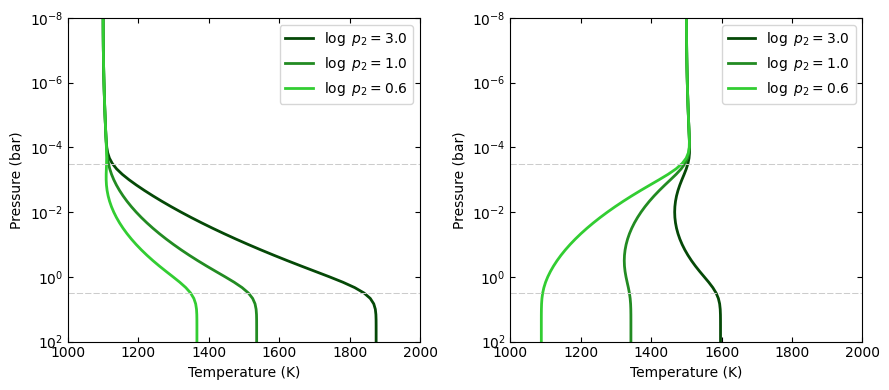

In [7]:
# log_p2 determines whether the atmosphere is thermally inverted
# (p1 < p2) or not (p1 > p2).

# Non-inverted TP profile
temp_madhu01 = tp_madhu([log_p1, -6.0, log_p3, a1, a2, T0_ninv])
temp_madhu02 = tp_madhu([log_p1, -4.0, log_p3, a1, a2, T0_ninv])
temp_madhu03 = tp_madhu([log_p1, -3.0, log_p3, a1, a2, T0_ninv])
# Note that p2 values impact the profile even if p2 < p1
# temp_madhu03 is technically an inverted profile, but a tiny inv.

# Inverted TP profile
temp_madhu11 = tp_madhu([log_p1, -2.0, log_p3, a1, a2, T0_inv])
temp_madhu12 = tp_madhu([log_p1, -0.5, log_p3, a1, a2, T0_inv])
temp_madhu13 = tp_madhu([log_p1, 1.0, log_p3, a1, a2, T0_inv])
# Note that p2 can have values larger than p3

temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[1]
labels = [f'{pname}$={val}$' for val in (3.0, 1.0, 0.6)]

plt.figure(34, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[2])
    ax.axhline(10**log_p1, lw=0.75, dashes=(6,2), color='0.8')
    ax.axhline(10**log_p3, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(1000, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()
plt.tight_layout()

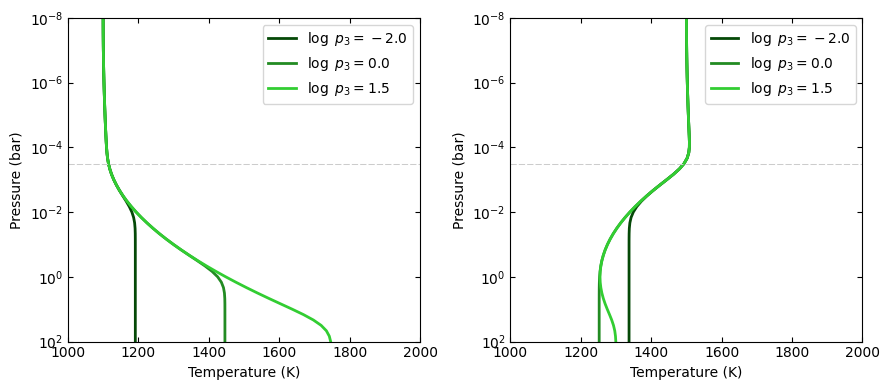

In [8]:
# logp3 sets the pressure of the isothermal lower layer:
# Note that p2 is allowed to be at a deeper location than p3

# Non-inverted TP profile
temp_madhu01 = tp_madhu([log_p1, log_p2_ninv, -2.0, a1, a2, T0_ninv])
temp_madhu02 = tp_madhu([log_p1, log_p2_ninv, 0.0, a1, a2, T0_ninv])
temp_madhu03 = tp_madhu([log_p1, log_p2_ninv, 1.5, a1, a2, T0_ninv])

# Inverted TP profile
temp_madhu11 = tp_madhu([log_p1, log_p2_inv, -2.0, a1, a2, T0_inv])
temp_madhu12 = tp_madhu([log_p1, log_p2_inv, 0.0, a1, a2, T0_inv])
temp_madhu13 = tp_madhu([log_p1, log_p2_inv, 1.5, a1, a2, T0_inv])

temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[2]
labels = [f'{pname}$={val}$' for val in (-2.0, 0.0, 1.5)]

plt.figure(35, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[2])
    ax.axhline(10**log_p1, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(1000, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()
plt.tight_layout()

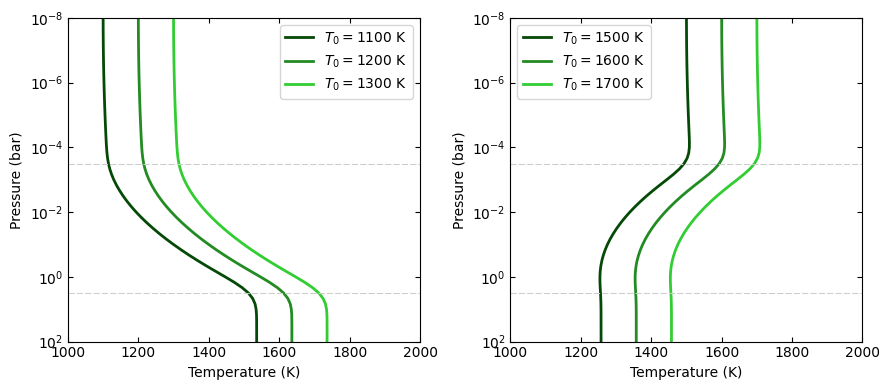

In [9]:
# T0 sets the temperature at the top of the profile:
# This shifts the entire profile

# Non-inverted TP profile
temp_madhu01 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, a2, 1100.0])
temp_madhu02 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, a2, 1200.0])
temp_madhu03 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, a2, 1300.0])

# Inverted TP profile
temp_madhu11 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, a2, 1500.0])
temp_madhu12 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, a2, 1600.0])
temp_madhu13 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, a2, 1700.0])

temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[5]
labels = [
    f'{pname}$={val}$ K'
    for val in (1100, 1200, 1300, 1500, 1600, 1700)
]

plt.figure(36, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[3*i+0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[3*i+1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[3*i+2])
    ax.axhline(10**log_p1, lw=0.75, dashes=(6,2), color='0.8')
    ax.axhline(10**log_p3, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(1000, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()
plt.tight_layout()